# Online Appendix
###  "Commitment costs: present-bias, consumer protection, and firm ownership forms"
#### Code to generate figures
**Karna Basu and Jonathan Conning**

Department of Economics, Hunter College and The Graduate Center, City University of New York

\*\*  **NOTE** \*\* The text and descriptions don't entirely correspond to  the interactive figures below.  This will be later cleaned up. 

**Abstract:** An empirical and theoretical literature has developed around models of procrastination and the struggle for self-control or resistance to present-bias or temptation. Following Laibson (1997) assumwconsumers are present-biased and have time inconsistent $\beta-\delta$ quasi-hyperbolic and preferences.  

  This note describes the relatively simple mathematical and graphical analysis of the challenges facing a time-inconsistent in consumer attempting to smooth consumption over time. Because the sophisticated present-biased quasi-hyperbolic discounter anticipates the ways in which her future self will attempt to renegotiate or refinance the terms of a contract, she acts to choose the terms of the contract anticipating her latter-period self's best reaction. The equilibrium contract is found as the sub-game perfect Nash equilibrium of a Stackelberg game.  The equilibrium that the time-inconsistent consumer can achieve on her own will in general deliver less utility than if the period zero consumer could commit their latter selves to sticking to the the terms of the contract that the period zero self prefers.  This gives rise to the demand fr commitment services.

## Python Preliminaries

Simulations and diagrams below were written in python.  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ipywidgets import interact,interact_manual, fixed
plt.rcParams['figure.figsize'] = 10, 8
np.set_printoptions(precision=2) 

## The model

Consider the following simple workhorse three-period consumption smoothing model where consumers' preferences are summarized by constant relative risk aversion (CRRA) utility. In any period the consumer's instantaneous utility is given by $u(c)=c^{1-ρ}/(1-ρ)$.  Over three period the agent maximizes utility

$$ U(c_0, c_1, c_2) =u(c_0) + \beta [\delta u(c_1) + \delta^2 u(c_2)]$$ 

This is a version of the classic $\beta-\delta$ quasi-hyperbolic discounting model.  We assume the consumer has an autarky income stream ${y}=\{y_{0},y_{1},y_{2}\}$ which defines autarky or reservation utility $ \overline{u}(y) = U(y₀,y₁,y₂)$ but in general will prefer a smoother consumption profile from contracting on financial markets. 

### Consumption smoothing with and without commitment services

#### Competitive full-commitment
Let's assume at first that financial intermediaries compete to offer a multiperiod contract and can -- at zero cost -- credibly commit to not renegotiate the terms of that contract. For the moment we also assume this contract to be enforceably exclusive in the sense that no other bank is allowed to offer a more attractive additional or alternative contract to the period 1 self.  We'll relax both assumptions shortly.

The offered contract will maximize the period-0 self's present value of utility $$ U(c_{0},c_{1},c_{2})=u(c_{0})+\beta \left[ \delta u(c_{1})+\delta ^{2}u(c_{2})\right] $$
subject to the bank's zero profit condition or, same thing, consumer budget constraint:

$$\sum\limits_{t=0}^{2}\frac{\left( y_{t}-c_{t}\right) }{\left( 1+r\right) ^{t}} = 0$$


At the optimal contract $C^fc$ the consumer may save or borrow, depending on their initial income stream and preferred/feasible smoothed consumption stream available from contracting.  

The first order conditions for an optimum are:

$$u'(c_0) = \beta \delta (1+r) u'(c_1)$$

$$u'(c_1) = \delta (1+r) u'(c_2)$$

The optimal contract will be the three period consumption profile that brings the consumer to the highest feasible iso-utility surface (analagous to an indifference curve except in 3 dimensins), and that will be at a point where the iso-utility surface is tangent to the zero-profit hyperplane that cuts through endowment point *$y$*  

For the CRRA case these can be rewritten as:

$$c_1 = c_2 = c_0 [ \beta \delta (1+r) ]^\frac{1}{\rho}$$

WLOG assume that $\delta = \frac{1}{1+r}$ and $r=0$ and hence $\delta = 1$. This simplifies the expressions without changing the essential tradeoffs.

If we substitute the FOC $c_1=c_2$ into the consumer's binding budget constraint (the bank's zero profit condition) the problem can be reduced from three equation (two FOC and the zero profit condition) to two:

$$c_1 = \beta^\frac{1}{\rho} c_0$$

$$ c_1 = \frac{\sum y - c_0}{2}$$

The first equation highlight's the period-zero self's present bias --they want to consume more in period zer than in period one--  while the second summarizes that hey want to smooth whatever resources are left to future consumption equally between periods 1 and 2. 

The two dashed lines meet at point $(c_0^{fc}, c_1^{fc})$ in the rightmost quadrant.  

The leftmost quadrant is in $c_1$ and $c_2$ space, turned on its side 90 degrees counterclockwise. The FOC condition ($c_1 = c_2$) is represented by a 45 degree line.  We can simply read off $c_2 = c_1$ from this line and the value of $c_1$ determined in the other quadrant, but we should also note that the point of intersection must also satisfy the budget constraint, namely that consumption in periods 1 and 2 cannot exceed the value of the endowment less period zero consumption. 

For the CRRA case it's easy to find closed form solutions:

$$c_0^{fc} = \frac{\sum y}{1+2\beta^\frac{1}{\rho}}$$
$$c_1^{fc} = c_2^{fc} = \beta^\frac{1}{\rho} c_0^{fc} $$

### A simple numerical example (no present bias)

Suppose the model parameters were as follows (and as all along $r=0$ and $\delta=1$)

In [2]:
beta = 0.5
rho = 1.0
Y = 300

The following function solves for period zero's optimal 'perfect commitment contract' under competition using the equations above:

In [3]:
def c0fc(beta=beta, rho=rho):
    '''Perfect Commitment contract'''
    btr = beta**(1/rho)
    c0 = Y/(1+2*btr)
    return c0, btr*c0, btr*c0

The optimal contract for these parameters is 

In [4]:
c0fc()

(150.0, 75.0, 75.0)

#### Borrowing/repaying 

If the consumer had an income stream  $ y =(100, 100, 100)$ then we'd interpret this as a borrowing contract, as the period 0 consumer would want to borrow 50 in period zero andthen balance repayments between period 1 and 2.

In [5]:
[100, 100, 100] - np.array(c0fc())

array([-50.,  25.,  25.])

#### Saving/withdrawing

If on the other hand the consumer had an income stream  $ y =(200, 50, 50)$ then we'd interpret this as a savings contrac, with the consumer saving 50 in period zero to be shared equally between period 1 and 2 consumption.

In [6]:
[200, 50, 50] - np.array(c0fc())

array([ 50., -25., -25.])

## Refinance and self-control

We recast this slightly to focus on the role of savings.  Period 0 self (henceforth 'zero-self') chooses period zero savings $s_0$ (and by implication period 0 consumption $c_0 = y_0 - s_0$).  In period 1 his later 'one-self' reacts by choosing her own preferred period 1 savings $s_1$ (or, same thing $c_1$ and by implication $c_2$).  

We need to find one-self's 'reaction function'.  They choose $c_1$ to maximize

$$u(c_{1})+\beta \delta u(c_{2})$$

subject to

$$c_1(1+r)+c_2 =y_1 (1+r) +y_2+s_0 (1+r)^2$$

The FOC give us

$$u'(c_{1})=\beta \delta(1+r) {u'(c_2)} $$

which for this CRRA case give us

$$c_{2} = [\beta \delta (1+r) ]^\frac{1}{\rho} c_1$$

Substituting this into the intertemporal budget constraint above we can solve for the reaction function:

$$ c_1(s_{0} )= \frac{s_0 (1+r)^2+y_1 (1+r) +y_2}
{(1+r)+[ \beta \delta(1+r)]^\frac{1}{\rho} }
 $$

Note that if $\delta=\frac{1}{1+r}$ and $r=0$ then this last expression simplifies to:
    
$$ c^1_1(s_{0} )= \frac{s_0+y_1 +y_2}{1 + \beta ^\frac{1}{\rho} }  $$
 
 Without loss of generality we will focus on this stripped down version of the expression.

Note that the zero-self wants each extra dollar of saving (or debt) $s_0$ that they pass on to period one that 1/2 of that dollar be for period 1 and the other half for period 2.  In other words they want

$$\frac{dc^0_1}{ds_0} = \frac{dc_2}{ds_0} =\frac{1}{2}$$

But One-self instead prefers 

$$\frac{dc^1_1}{ds_0} =\frac{1}{1+\beta^\frac{1}{\rho}} > \frac{1}{2}$$
and 
$$\frac{dc^1_2}{ds_0} =\frac{\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}}<\frac{1}{2}$$

Zero-self will therefore act to strategically control how much savings is passed on, behaving much like a Stackelberg leader.

They choose $s_0$ to:
    
$$\max u(y_0-s_{0})+\beta \left[ u(c^1_1(s_0))+u(c^1_2(s_0))\right] $$

Recall that One-self will always have $c_2^1 =\beta^\frac{1}{\rho} c_1^1$ and also note that for the CRRA case we can write
$u(\beta^\frac{1}{\rho}c_1^1)=\beta^\frac{1-\rho}{\rho}u(c_1^1)$ 
so we can rewrite the objective as:

$$\max u(y_0-s_{0})+\beta (1+\beta^\frac{1-\rho}{\rho}) u(c^1_1(s_0))$$

The  FOC will therefore be:
$$u'(y_0-s_0) = \beta (1+\beta^\frac{1-\rho}{\rho}) u'(c_1^1(s_0)) \frac{dc_1^1}{ds_0}$$

$$u'(y_0-s_0) = \frac{\beta +\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}} u'(c_1^1(s_0)) $$

and after some substitutions and simplifications:
$$(y_0-s_0)^{-\rho}
= \frac{ \beta+\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}}
(\frac{s_0+y_1 +y_2}{1 + \beta ^\frac{1}{\rho} })^{-\rho} $$

$$   \frac{s_0+y_1 +y_2}{1 + \beta ^\frac{1}{\rho} }
= \Lambda^\frac{1}{\rho}
(y_0-s_0) $$

where $\Lambda = \frac{\beta +\beta^\frac{1}{\rho}}{1+\beta^\frac{1}{\rho}}$

Or solving for  $c_0$ :

$$c_0 = \frac{\sum y}{1+\Lambda^\frac{1}{\rho}(1+\beta^\frac{1}{\rho})} $$

Note that we can compare period 0 consumption under this 'own smoothing' situation to the full commitment situation where we have shown that:

$$c_0 = \frac{\sum y}{1+2\beta^\frac{1}{\rho}} $$

From which it's clear that savings is higher or lower depending on a comparison of the two denominators... Empirically however the difference in period 0 consumption seems very small... Most of the action is in terms of period 1 and 2 as the follownig shows.

### Visualized

Here below the c0own is the present-bias optimum (without commitment)

In [7]:

def c0own(beta=beta, rho=rho):
    '''Own-smoothing contract'''
    btr = beta**(1/rho)
    lm = (beta + btr)/(1+btr)
    c0 = Y/(1+(1+btr)*lm**(1/rho))
    c1 = (Y-c0)/(1+btr)
    c2 = btr*c1
    return c0, c1, c2
    
    
def plotC(rho=rho):
    bt = np.linspace(0,1, 20)
    fig, ax = plt.subplots(figsize=(7,6))
    fig.suptitle(r'$\rho$ = {}'.format(rho),fontsize=18)
    c0F,c1F,c2F = c0fc(bt, rho)
    c0o,c1o,c2o = c0own(bt, rho)
    ax.plot(bt, c0F, 'b', label='c0F')
    ax.plot(bt, c1F, 'r',  label='c1F = c2F')
    #ax.plot(bt, c0F+c1F, color='orange', label='c0f+c1F')
    ax.plot(bt, c0o,':', 'b', label='c0rp')
    ax.plot(bt, c1o,':',label='c1rp', color = 'red')
    #ax.plot(bt, c0o+c1o,'--',color='orange',label='c0rp+c1rp')
    ax.plot(bt, c2o,'--', color='green', label='c2rp')
    
    ax.set_xlabel(r'$\beta$', fontsize=16)
    plt.grid()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.6))
    plt.show()
    return

In [8]:
beta, rho

(0.5, 1.0)

In [9]:
c0fc(beta, rho)

(150.0, 75.0, 75.0)

In [10]:
c0own()

(150.0, 100.0, 50.0)

In [11]:
interact(plotC,y0=(1,150,1),y1=(1,150,1),rho=(0.1,3,0.05));

interactive(children=(FloatSlider(value=1.0, description='rho', max=3.0, min=0.1, step=0.05), Output()), _dom_…

Observations:  
- c0rp and c0F differ only for $\rho$ quite different from 1
- At $\rho = 1$ c0 (and therefore c1+c2) do NOT change.  At $\rho >1$ $c0$ is reduced (more is passed forward) and at $\rho < 1$ $c0$ is increased (less is passed forward) but these effects are rather small.
- not sure why a solid green c0rp legend is appearing!?

## Best response function, and Stackelberg  (older approach)

In this competitive case all that matters is $c_0$ as then $Y-c_0$ is passed forward.

In [12]:
def c1br(c0, beta=beta, rho=rho):
    '''One-self's best response to Zero-self contract '''
    btr = beta**(1/rho)
    c11 = (Y - c0)/(1+btr)
    c12 = btr*c11
    return c0,c11,c12
    
    
def C1BR(s, beta=beta, rho=rho):
    '''One-self's best response to Zero-self contract 
    Implemented for resources s passed into c1-c2 space'''
    btr = beta**(1/rho)
    c11 = s/(1+btr)
    c12 = btr*c11
    return c11,c12


# this is like c0own above

def c0rp(beta=beta, rho=rho):
    '''Zero's Stackelberg contract when kappa=0'''
    btr = beta**(1/rho)
    lam = (beta + btr)/(1+btr)
    lmr = lam**(1/rho)
    c00rp = Y/(1+(1+btr)*lmr)
    c01rp = lmr*c00rp
    c02rp = btr*c01rp
    return c00rp, c01rp, c02rp 



In [13]:
c0fc(), c0rp(), c0own()

((150.0, 75.0, 75.0), (150.0, 100.0, 50.0), (150.0, 100.0, 50.0))

In [14]:
C1BR(Y-150)

(100.0, 50.0)

In [15]:
cc = np.linspace(0,300,300)

In [16]:
cc = np.linspace(0,300, 100)
btr = beta**(1/rho)
lam = (beta + btr)/(1+btr)
lmr = lam**(1/rho)

## Two-quadrant plot

In [17]:
def bdplot(beta=beta, rho=rho, fc = True, rp = True, figname='Figure'):
    '''Plot two quadrant diagram representation. The flag fc and rp allow us to turn on
    or supress full commit or '''
    ymax = 200
    aspect = 1
    cfc = c0fc(beta=beta, rho=rho)
    crp = c0rp(beta=beta, rho=rho)
    fontsize = 18
    
    btr = beta**(1/rho)
    lam = (beta + btr)/(1+btr)
    lmr = lam**(1/rho)

    fig = plt.figure(figsize=(10,8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 

    ax0 = plt.subplot(gs[1])
    ax0.set_title(r'$\beta=$ {:2.1f} $\rho=$ {:2.1f}'.format(beta, rho))
    ax0.set_ylim(0, ymax)
    ax0.yaxis.set_label_position("right")
    ax0.yaxis.tick_right()
    ax0.set_xlabel(r'$c_0$', fontsize=fontsize)
    ax0.set_ylabel(r'$c_1$', fontsize=fontsize)

    ax1 = plt.subplot(gs[0])
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_label_position('left')
    ax1.set_ylabel(r'$c_1$', fontsize=fontsize)
    ax1.set_title(r'$cfc=$ ({:3.1f}, {:3.1f}, {:3.1f})'.format(cfc[0],cfc[1],cfc[2]))
    
    if fc:
        fcstyle = '--'
        fccolor = 'r'
        if fc and not rp:
            linestyle = '-'
        ax0.plot(cc, 0.5*(Y-cc),'r--', label='Zero FC future')
        ax0.plot(cc, btr*cc, linestyle=fcstyle, color = fccolor, label='FC smooth')
        ax0.plot(cfc[0],cfc[1], marker='o')
        ax0.plot(cc, Y-cc, ':', label = 'Future net income')
        ax1.plot(cc, (Y-cfc[0])-cc,'k-')
        ax1.plot(cc, cc*btr**(-1),'b-')
        ax1.plot(cc, cc,'r--')
        ax1.plot(cfc[2], cfc[1],marker='o')
        ax0.text(250, btr*230, r'$\beta^\frac{1}{\rho}$', fontsize=15)
        xx = [cfc[0]]
        yy = [cfc[1]]
        zz = [cfc[2]]
        [ax0.plot([dot_c0, dot_c0], [0, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ] 
        [ax0.plot([0, dot_c0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([0, dot_c0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([dot_c0, dot_c0], [dot_c1, Y-dot_c0],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([dot_c0, 0], [Y-dot_c0, Y-dot_c0],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax1.plot([dot_c2, dot_c2], [0, dot_c1],':',linewidth = 1,color='black' ) for dot_c1, dot_c2 in zip(yy,zz) ]
        [ax1.plot([dot_c2,0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c1, dot_c2 in zip(yy,zz) ]

    if rp:
        ax0.plot(cc, c1br(cc, beta, rho)[1],'b-', label = 'One BR')
        ax0.plot(cc, lmr*cc,'b-', label='Stackelberg')
        ax0.plot(crp[0],crp[1],marker='o')    
        ax0.text(250, lmr*235, r'$\Lambda^\frac{1}{\rho}$', fontsize=15)
        ax1.plot(crp[2], crp[1],marker='o')
        xx = [crp[0]]
        yy = [crp[1]]
        zz = [crp[2]]
        [ax0.plot([dot_c0, dot_c0], [0, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ] 
        [ax0.plot([0, dot_c0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([0, dot_c0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([dot_c0, dot_c0], [dot_c1, Y-dot_c0],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax0.plot([dot_c0, 0], [Y-dot_c0, Y-dot_c0],':',linewidth = 1,color='black' ) for dot_c0, dot_c1 in zip(xx,yy) ]
        [ax1.plot([dot_c2, dot_c2], [0, dot_c1],':',linewidth = 1,color='black' ) for dot_c1, dot_c2 in zip(yy,zz) ]
        [ax1.plot([dot_c2,0], [dot_c1, dot_c1],':',linewidth = 1,color='black' ) for dot_c1, dot_c2 in zip(yy,zz) ]

    ax1.set_ylim(0,ymax)
    ax1.set_xlim(0,150)
    ax0.set_xlim(0,300)
    ax1.invert_xaxis()
    ax1.set_xlabel('$c_2$', fontsize=fontsize)

    for side in ['right','top']:
        ax0.spines[side].set_visible(False)
        ax1.spines[side].set_visible(False)

    #scaling and grid    
    ax0.set_aspect(aspect)
    ax1.set_aspect(1)
    #ax0.grid()
    #ax1.grid()

    #ax0.text(20, 0.5*(Y-50), r'$\frac{1}{2}\sum (y-c_0)$', fontsize=14)
    #ax0.text(20, (1/(1+btr))*(Y-30), r'$\frac{1}{1+\beta^\frac{1}{\rho}}\sum (y-c_0)$', fontsize=14)

    ax1.text(btr*150, 150,  r'$\beta^\frac{1}{\rho}$', fontsize=15, rotation='vertical')


    fig.subplots_adjust(wspace=0)
    plt.show()
    #fig.savefig(figname+'.jpg', dpi=fig.dpi)
    return

**Efficient and renegotiation-proof contracts**

Notes: With $\kappa=0$ Zero will have to accomodate to One's desire to tilt the resources passed forward toward period 1 consumption.  
- So now $\frac{1}{1+\beta^\frac{1}{\rho}}>\frac{1}{2}$ of resources ($y-c_0$) passed forward are earmarked in the contract for $c_1$ (e.g. at $\beta=0.5$ and $\rho=1.0$ $\frac{2}{3}$ rather than $\frac{1}{2}$ of the 150 passed forward is for $c_1$.)
- However Zero also now raises the share that they want for themselves from $\beta^\frac{1}{\rho}$ to $\Lambda^\frac{1}{\rho}$

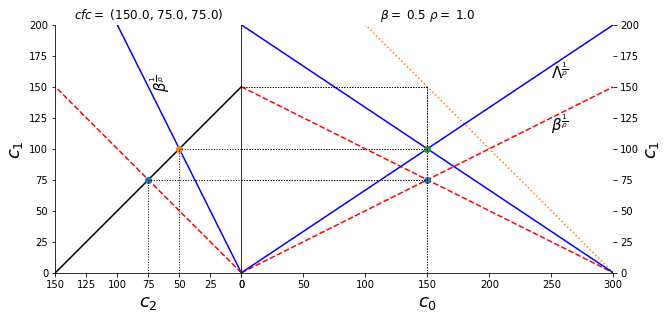

In [18]:
bdplot(fc=True, rp=True, figname='Figure1')

In [19]:
interact(bdplot,beta=(0.1,1,0.1),rho=(0.1,3,0.05));

interactive(children=(FloatSlider(value=0.5, description='beta', max=1.0, min=0.1), FloatSlider(value=1.0, des…

## Figures using the Contract module

Code to provide a modular approach to solving contracts in the [Contract.py](Contract.py) module

The following notebook magic makes ure the module is reloaded after every edit.

In [20]:
%load_ext autoreload
%autoreload 2

In [21]:
import Contract

### Sample Competitive contracts

We create an instance of a Competitive Contract.  This basically just loads up parameters.  We'll later solve for contracts with methods such as `.fcommit` 

In [22]:
cC = Contract.Competitive(beta = 0.6)
cC.rho = 1.2
cC.print_params()

beta    : 0.6
guess   : [100 100 100]
kappa   : 0
rho     : 1.2
y       : [100 100 100]


The threshold level renegotiation cost to sustain efficient contract:

In [23]:
cC.kbar()

4.43642366042653

The efficient Competitive contract for these parameters.

In [24]:
cC.fcommit()

array([130.06,  84.97,  84.97])

The constrained optimal competitive contract when $\kappa = 0$

In [25]:
cC.kappa = 0
cC.opt()

array([129.73, 102.99,  67.28])

Effect of raising $\kappa$ on optimal contract

In [26]:
cC.kappa = 1
cC.opt()

array([130.38,  94.25,  75.36])

### Monopoly cases

An instance of a Monopoly Contract class.

In [27]:
cM = Contract.Monopoly(beta=0.6)
cM.rho = 1.2
cM.print_params()

beta    : 0.6
guess   : [100 100 100]
kappa   : 0
rho     : 1.2
y       : [100 100 100]


The efficient Competitive contract for these parameters.

In [28]:
cM.fcommit()

array([126.7 ,  82.78,  82.78])

In [29]:
cM.kbar()

4.3219284107549765

In [30]:
cM.kappa = 0 
cM.opt()

array([128.33, 101.88,  66.56])

#### Plotting functions

Since several different plots share a basic axis labeling setup, it will be useful to set things up similarly with this function.

In [31]:
def fig_base(figsize=(9,9)):
    fig, ax = plt.subplots(figsize=figsize)    
    # plot range and clipped range (so indif curves not so wide)
    c1min = 0
    c1max = 140
    c1 = np.arange(c1min,c1max,c1max/50)
    c1_ = np.arange(0.2*c1max,c1max*0.8,c1max/50)
    
     # Aesthetics
    ax.set_xlim(0,c1max)
    ax.set_ylim(0,c1max*0.8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #ax.axes.get_xaxis().set_visible(False)
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    ax.set_xlabel(r'$c_1$', fontsize=16)
    ax.set_ylabel(r'$c_2$', fontsize=16)
    ax.set_aspect('equal')
    return ax

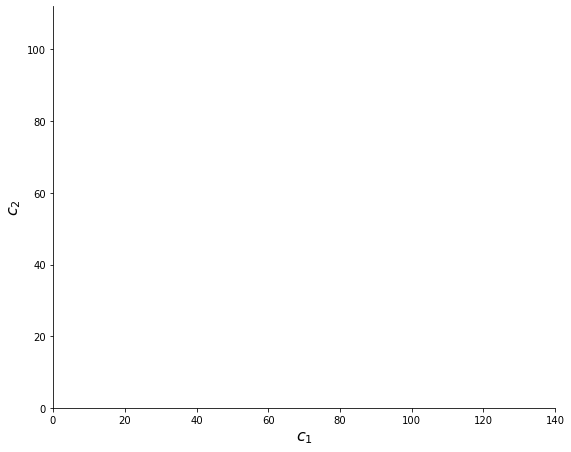

In [32]:
fig_base();

In [33]:
cC.kappa=0
cC.ownsmooth(), cC.opt()

(array([129.73, 102.99,  67.28]), array([129.73, 102.99,  67.28]))

In [34]:
def fig1(comp=True, kap=0, beta=0.3, rho=0.9):
    '''Plot contract diagrams based on model parameters'''
    
    ax = fig_base()   #draw and label axes 
    
    if comp:
        cC = Contract.Competitive(beta=beta) 
    else:
        cC = Contract.Monopoly(beta=beta)
    
    cC.kappa, cC.beta, cC.rho = kap, beta, rho
    cCF = cC.fcommit()
    cCRP = cC.reneg(cCF)
    copt = cC.opt()
    
    #indif curve plotting
    c1min, c1max = 0, 140
    c1 = np.arange(c1min,c1max,c1max/50)
    c1_ = np.arange(0.2*c1max,c1max*0.8,c1max/50)
    
    def draw_indif(Cpt, beta, color='red'):  
        ubar = cC.PVU(Cpt[1:3], beta)  
        idc  = cC.indif(ubar, beta)            # as a function we'll use below

        clipval = Cpt[1]*1.2     # for clipping the line   
        c2_ = idc(c1_)          # Zero's indif through F
        c2_ = np.where(c2_<clipval, c2_, np.nan)
        ax.plot(c1_,c2_,color=color)
        ax.scatter(Cpt[1], Cpt[2],color=color)
    
    #indifference curves functions
    draw_indif(cCF, beta=1, color='red')   #zero's curve through F
    draw_indif(copt, beta, color='blue')     #one's curve through P(kap)
    
    # rays from origin
    ax.plot(c1, c1,':',color='black')
    ax.plot(c1, cC.beta**(1/cC.rho)*c1,':',color='black')
        
    # isoprofit line(s)
    isoprofline = cC.isoprofit(cC.profit(copt,cC.y)-(cC.y[0]-copt[0]), cC.y)
    isoproflineK = cC.isoprofit(cC.profit(copt,cC.y)-(cC.y[0]-copt[0])+kap, cC.y)
    ax.plot(c1,  isoprofline(c1),':' )
    ax.plot(c1,  isoproflineK(c1),':' )
    
    # Labels and points
    ax.text(cCF[1]-1, cCF[2]+3, r'$F$', fontsize=14)
    ax.text(copt[1]-3, copt[2]-5, r'$P$', fontsize=14)
    xx = [cCF[1], copt[1]]
    yy = [cCF[2], copt[2]]
    ax.scatter(xx, yy, s=50, marker='o',color='b')  
    #ax.savefig('figs\Figure1.pdf', format='pdf')
    
    #-- Intercept points on y axis

    ax.text(cCF[1]+cCF[2] + 1, -4, r'$c_1^*+c_2^*$', fontsize=10)
    ax.text(cCRP[1] + cCRP[2] - kap - 8, -4, r'$c_1^*+c_2^* -\bar \kappa$', fontsize=10)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

## Figure 1

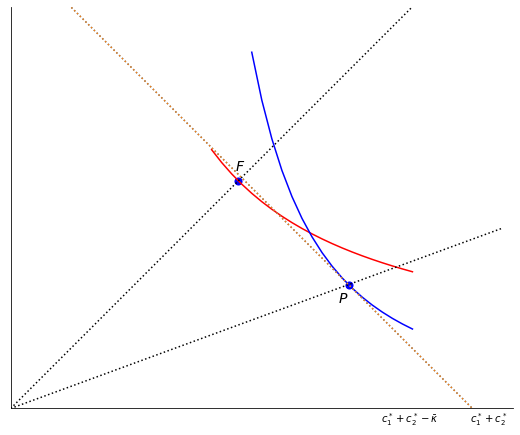

In [35]:
fig1(comp=True, kap=0, beta=0.3, rho=1.2)

Interactive Figure 1

In [36]:
interact(fig1, comp=([True, False]), kap=(0,20,1), beta=(0.3,0.9,0.05), rho=(0.5,4,0.1));

interactive(children=(Dropdown(description='comp', options=(True, False), value=True), IntSlider(value=0, desc…

### The hybrid firm

##Optimal contract when renegotiation cost $\kappa $ >0

Plot to explore how the renegotiation cost $\kappa $ affects the terms of the contract and firm profits

In [37]:
def kcost(comp=True, beta=0.3, rho=0.9):
    if comp:
        cC = Contract.Competitive(beta=beta) 
        label = 'Zero-self Utility'
    else:
        cC = Contract.Monopoly(beta=beta)
        label = 'Monopoly Profit' 
    cC.rho = rho
    cC.y = np.array([100,100,100]) 
    cCF = cC.fcommit()
    num_pts = 50
    kaps = np.linspace(0, 15, num_pts)      # different renegotiation cost values 
    cCRP, pvu0RP = np.zeros((3,num_pts)), np.zeros(num_pts)  # init (c0,c1,c2) and profits at each kappa

    for i in range(0,num_pts):               # look through kappa recalculating optimal contract each time
        cC.kappa = kaps[i] 
        cCRP[:,i] = cC.opt() 
        if comp:
            pvu0RP[i] = cC.PVU(cCRP[:,i],cC.beta)
        else:
            pvu0RP[i] = sum(cC.y) - cC.PV(cCRP[:,i])
        

    c0,c1,c2 = cCRP[0,:], cCRP[1,:],cCRP[2,:]                # save results for plotting

    fig, (ax0, ax1) = plt.subplots(2, 1,figsize=(10,8), squeeze=True)
    ax0.plot(kaps, c1, label='$c_{1}$')
    ax0.plot(kaps, c2, label='$c_{2}$')
    ax0.plot(kaps, np.ones(num_pts)*cCF[1], '--', label='$c_{F}$')
    ax0.grid()
    ax0.set_title('Reneg-Proof Contract, ' + label +' and $\kappa$', fontsize=16) 
    ax0.set_ylabel('consumption')
    #ax0.set_ylim(30,95)
    ax0.legend()

    ax1.plot(kaps, pvu0RP)
    ax1.set_ylabel(label)
    ax1.grid()
    ax1.set_xlabel('renegotiation cost $\kappa$')
    pvumin,pvumax = min(pvu0RP), max(pvu0RP)
    plt.ylim((pvumin, pvumax))
    plt.show()
    return c0

Note this plots but also returns c0 which we'll use for plotting below.

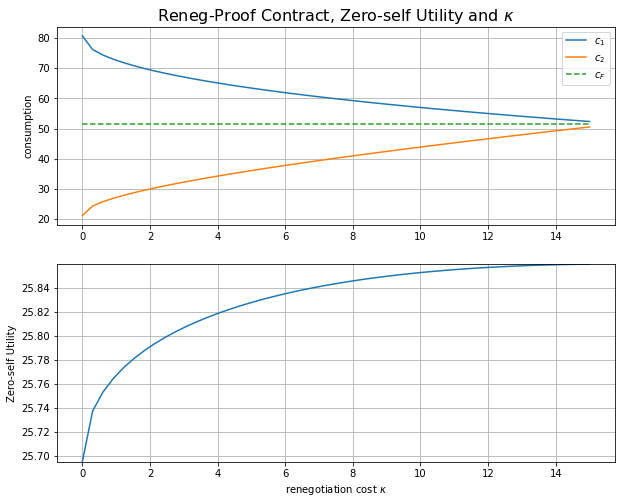

In [38]:
c0 = kcost(comp=True, beta=0.3, rho=0.9)

In [39]:
interact(kcost, comp=([True, False]),  beta=(0.3,0.9,0.05), rho=(0.5,4,0.1));

interactive(children=(Dropdown(description='comp', options=(True, False), value=True), FloatSlider(value=0.3, …

At lower renegotiation costs the bank is forced to offer less consumption smoothing in periods 1 and 2 as a way to credibly commit to limit their gains to renegotiation with a period 1 self.  Hence bank profits rise with their ability to commit to incur a renegotiation cost $\kappa$

We haven't plotted $c_{0}$ for each $\kappa$ but that's because it varies less relative to $c_{1}, c_{2}$ and way above the full commitment consumption smoothing. The following shows a non-monotonic relation though ws should remember this is varying very little.

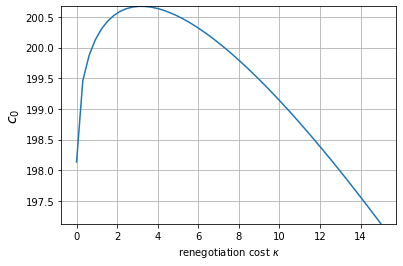

In [40]:
# remember we loaded c0 above
kaps = np.linspace(0, 15, 50)
plt.plot(kaps, c0) 
plt.ylim((min(c0), max(c0)))
plt.xlabel('renegotiation cost $\kappa$')
plt.ylabel(r'$c_0$', fontsize=14)
plt.grid()


### The choice to become a commercial non-profit

### Modeling the non-profit

The no-renegotiation constraint has two parts.  A pure for-profit captures fraction $\alpha = 1$ of profits and faces renegotiation cost 
not-for-profit of type $\alpha$ and faces renegotiation cost $h(\alpha) = h(1)$.  More generally a non-profit of type $\alpha$ has a no-renegotiation constraint of the form 
$$\alpha \left[ \Pi ^{R}-\Pi \right] \geq h(\alpha )$$

To be specific here let's model this as 
$$h(\alpha )=\kappa \left( 1-\alpha \right) $$

So that at $\alpha =1$ there is no cost to renegotiation and at $0< \alpha <1$ there is a non-negative non-pecuniary cost of up to $\kappa$.  The constraint can then be written as 
$$\left[ \Pi ^{R}-\Pi \right] \geq C(\alpha )=\frac{h(\alpha )}{\alpha }$$

Now similar to above but solve for contract as a function of firm type $alpha$

In [41]:
def alpha_plot(comp=True, beta=0.5, rho=0.9, y0=100):
    fig3 = plt.figure() 
    if comp:
        cC = Contract.Competitive(beta=beta) 
    else:
        cC = Contract.Monopoly(beta=beta)
        
    y = np.array([y0, (300-y0)/2,(300-y0)/2])          # To see how endowment affects contract
    cC.y     = y
    print(f'autarky income = {y}')
        
    cC.rho   = rho
    cCF      = cC.fcommit()
    num_pts  = 50
    alphs    = np.linspace(0.0,1.0, num_pts)   # iterate over different values of beta
    HA       = 10*(np.ones(num_pts) - alphs)   #  h(alpha)/alpha  or cost of renegotiaton
    cCRP     = np.zeros((3,num_pts))          # matrix for storing (c0,c1,c2) at each kappa
    pvu0RP   = np.zeros(num_pts)           #PVU0 when contracting with alpha=1 firm

    for i in range(0, num_pts):
        cC.kappa = HA[i]                 # change optimal contract
        cCRP[:,i] = cC.opt() 
        pvu0RP[i] = cC.PVU(cCRP[:,i], cC.beta)

    #last entry (kappa=0) tells us what a 'pure profit' would earn
    pvu0RP_pure = pvu0RP[-1]

    c0,c1,c2 = cCRP[0,:], cCRP[1,:],cCRP[2,:]                # save results for plotting

    fig3 = plt.figure()  
    plt.plot(alphs,c1,'--',label='$c_{1}$')
    plt.plot(alphs,c2,label='$c_{2}$')
    plt.plot(alphs,np.ones(num_pts)*cCF[1],label='$c_{1}$ commit')
    plt.grid()
    plt.title('Renegotiation Proof Contract and alpha' )
    plt.xlabel('alpha ')
    plt.ylabel('consumption')
    plt.legend(loc='best', bbox_to_anchor=(1,0.75))
    plt.ylim(0,100)
    plt.show()

autarky income = [100. 100. 100.]


<Figure size 432x288 with 0 Axes>

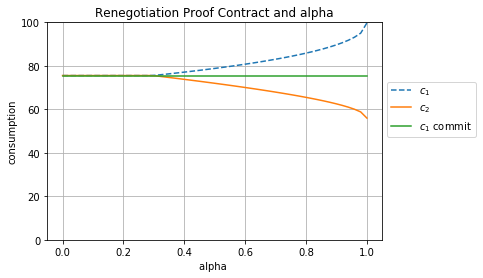

In [42]:
alpha_plot(comp=False, beta=0.5, rho=1.2, y0=100)

In [43]:
interact(alpha_plot, comp=([True, False]),  beta=(0.3,0.9,0.05), rho=(0.5,4,0.1), y0=(0,200,10));

interactive(children=(Dropdown(description='comp', options=(True, False), value=True), FloatSlider(value=0.5, …

### 'Commercial' non-profits 
A 'pure' for profit (with $\alpha$=1.0) earns a reduced (possibly negative) profit due to it's inability to commit. Seen in the plot as profits the height of the horizontal line.

Any non-profit with $\alpha$ above about 0.4 and below 1.0 can better commit to not renegotiate a larger set of contracts and therefore can offer a more profitable renegotiation-proof contract. Even though they capture only fraction $\alpha$ of those profits, the take home profits exceed the profits of the pure for-profit. 

In [44]:
def hybrid_plot(beta=0.5, rho=0.9, y0=100):

    cC = Contract.Monopoly(beta=beta)
        
    y = np.array([y0, (300-y0)/2,(300-y0)/2])          # To see how endowment affects contract
    cC.y     = y
    print(f'autarky income = {y}')
        
    cC.rho   = rho
    cCF      = cC.fcommit()
    num_pts  = 50
    alphs    = np.linspace(0.0,1.0, num_pts)   # iterate over different values of beta
    HA       = 10*(np.ones(num_pts) - alphs)   #  h(alpha)/alpha  or cost of renegotiaton
    cCRP     = np.zeros((3,num_pts))          # matrix for storing (c0,c1,c2) at each kappa
    value_hybrid = np.zeros(num_pts)           #PVU0 when contracting with alpha=1 firm
    value_raw = np.ones(num_pts)
    zero_profit = np.zeros(num_pts)

    
    for i in range(0,num_pts):               # look through kappa recalculating optimal contract each time
        cC.kappa = HA[i] 
        cCRP[:,i] = cC.opt() 
        value_raw[i] = sum(cC.y) - cC.PV(cCRP[:,i])   # raw profits 
        value_hybrid[i] = value_raw[i] * alphs[i]

    value_pure = value_hybrid[-1]*np.ones(num_pts)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.suptitle('Captured profits for hybrid firms and pure-profit firms')
    plt.title('as a function of '+r'$\alpha$' )
    plt.xlabel(r'type of firm $ \alpha$')
    plt.ylabel('Captured profits')
    plt.plot(alphs, value_pure,'--', label='pure for-profit')
    plt.plot(alphs, value_hybrid, label='hybrid captured profit')
    plt.plot(alphs, value_raw,label='raw profit')
    plt.plot(alphs, zero_profit, linestyle=':', label='zero-profit line')
    
    wh = (value_hybrid>=value_pure) & (value_hybrid>=zero_profit )
    #ax.fill_between(alphs, value_hybrid, value_pure, where=wh, hatch='/')
    ax.fill_between(alphs, np.fmax(value_hybrid, value_pure), 
                           np.fmax(value_pure,zero_profit), where=wh, hatch='/')
    plt.legend(loc='best', bbox_to_anchor=(1,0.75))
    plt.show()

autarky income = [100. 100. 100.]


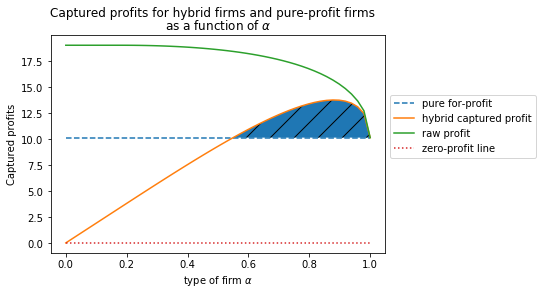

In [45]:
hybrid_plot(beta=0.5, rho=0.9, y0=100)

In [46]:
interact(hybrid_plot, comp=fixed(False),  beta=(0.3,0.9,0.05), rho=(0.5,4,0.1), y0=(0,200,5));

interactive(children=(FloatSlider(value=0.5, description='beta', max=0.9, min=0.3, step=0.05), FloatSlider(val…